In [50]:
import numpy as np
import random
import matplotlib.pyplot as plt

def srgm(parameters, data):
    a, b, c, alpha, beta = parameters
    t = np.arange(1, len(data) + 1)
    failure_predicted = (a * (1 - np.exp(-b * t)) * (1 - alpha) + alpha * a * (t ** b)) / (1 + c * np.exp(-b * t))
    return np.sum((data - failure_predicted) ** 2)

def fitness_function(parameters, data):
    return 1 / (1 + srgm(parameters, data))

def genetic_algorithm(data, generations, population_size, mutation_rate):
    def roulette_wheel_selection(fitness_scores):
        total_fitness = sum(fitness_scores)
        selection_probabilities = [score / total_fitness for score in fitness_scores]
        return np.random.choice(len(fitness_scores), p=selection_probabilities)

    def crossover(parent1, parent2):
        alpha = random.uniform(0, 1)
        beta = random.uniform(0, 1)
        child = [alpha * gene1 + (1 - alpha) * gene2 for gene1, gene2 in zip(parent1, parent2)]
        child[0] = max(0, min(10, child[0]))  # Ensure a is within [0, 10]
        child[1] = max(0, min(10, child[1]))  # Ensure b is within [0, 10]
        child[2] = max(0, min(10, child[2]))  # Ensure c is within [0, 5]
        child[3] = max(0, min(10, child[3]))  # Ensure alpha is within [0, 10]
        child[4] = max(0, min(10, child[4]))  # Ensure beta is within [0, 10]
        return child

    def mutate(individual, mutation_rate):
        mutated_individual = []
        for gene in individual:
            if random.uniform(0, 1) < mutation_rate:
                mutated_individual.append(random.uniform(0, 1))
            else:
                mutated_individual.append(gene)
        return mutated_individual

    population = []
    for _ in range(population_size):
      a = random.uniform(0, 1)
      b = random.uniform(0, 1)
      c = random.uniform(0, 2)
      alpha = random.uniform(0, 25)
      beta = random.uniform(0, 5)
      population.append([a, b, c, alpha, beta])

    for generation in range(generations):
        fitness_scores = []
        for individual in population:
            fitness_scores.append(fitness_function(individual, data))

        best_individual = population[np.argmax(fitness_scores)]
        print(f"Generation: {generation}, Best Fitness: {max(fitness_scores)}, Best Individual: {best_individual}")

        new_population = [best_individual]
        while len(new_population) < population_size:
            parent1 = population[roulette_wheel_selection(fitness_scores)]
            parent2 = population[roulette_wheel_selection(fitness_scores)]
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)

        population = new_population

    return best_individual

failure_data = np.array([5, 10, 15, 20, 26, 34, 36, 43, 47, 49, 80, 84, 108, 157, 171, 183, 191, 200, 204, 211, 217, 226, 230, 234, 236, 240, 243, 252, 254, 259])
best_parameters = genetic_algorithm(failure_data, generations=150, population_size=200, mutation_rate=0.1)

def generate_predictions(parameters, data):
    a, b, c, alpha, beta = parameters
    t = np.arange(1, len(data) + 1)
    failure_predicted = (a * (1 - np.exp(-b * t)) * (1 - alpha) + alpha * a * (t ** b)) / (1 + c * np.exp(-b * t))
    return failure_predicted

predictions = generate_predictions(best_parameters, failure_data)


Generation: 0, Best Fitness: 5.9159978315250887e-05, Best Individual: [0.8439271349479928, 0.8823674821865768, 1.0685787356267928, 17.926945089567834, 0.8690453389935265]
Generation: 1, Best Fitness: 5.9159978315250887e-05, Best Individual: [0.8439271349479928, 0.8823674821865768, 1.0685787356267928, 17.926945089567834, 0.8690453389935265]
Generation: 2, Best Fitness: 5.9159978315250887e-05, Best Individual: [0.8439271349479928, 0.8823674821865768, 1.0685787356267928, 17.926945089567834, 0.8690453389935265]
Generation: 3, Best Fitness: 5.9159978315250887e-05, Best Individual: [0.8439271349479928, 0.8823674821865768, 1.0685787356267928, 17.926945089567834, 0.8690453389935265]
Generation: 4, Best Fitness: 5.9159978315250887e-05, Best Individual: [0.8439271349479928, 0.8823674821865768, 1.0685787356267928, 17.926945089567834, 0.8690453389935265]
Generation: 5, Best Fitness: 5.9159978315250887e-05, Best Individual: [0.8439271349479928, 0.8823674821865768, 1.0685787356267928, 17.92694508956

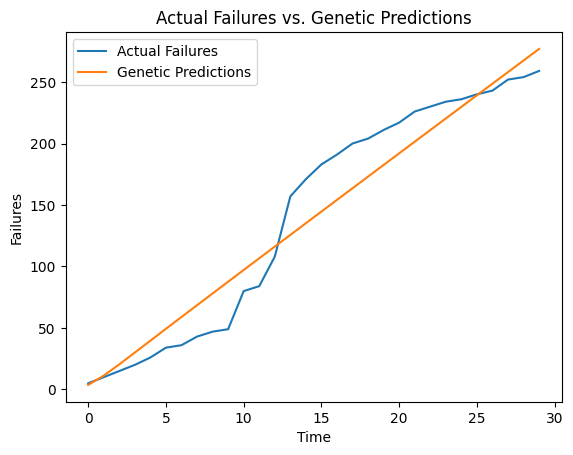

In [54]:
plt.plot(failure_data, label='Actual Failures')
plt.plot(predictions, label='Genetic Predictions')
plt.xlabel('Time')
plt.ylabel('Failures')
plt.title('Actual Failures vs. Genetic Predictions')
plt.legend()
plt.show()

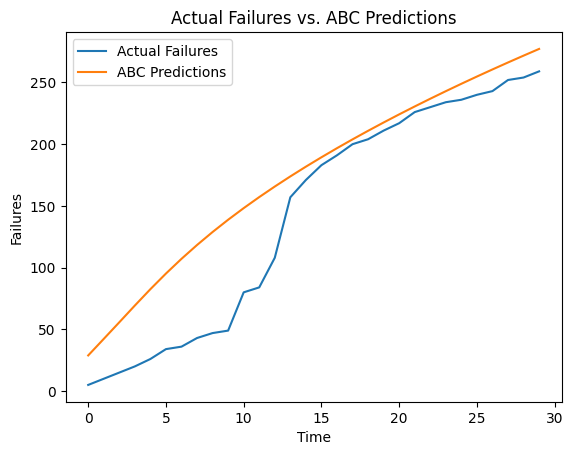

In [46]:
import numpy as np
import random
import matplotlib.pyplot as plt

def srgm(parameters, data):
    a, b, c, alpha, beta = parameters
    t = np.arange(1, len(data) + 1)
    failure_predicted = (a * (1 - np.exp(-b * t)) * (1 - alpha) + alpha * a * (t ** b)) / (1 + c * np.exp(-b * t))
    return np.sum((data - failure_predicted) ** 2)

def objective_function(parameters, data):
    return srgm(parameters, data)

def abc_optimization(data, generations, population_size, limit):
    def initialize_population():
        population = []
        for _ in range(population_size):
            a = random.uniform(0, 10)
            b = random.uniform(0, 10)
            c = random.uniform(0, 5)
            alpha = random.uniform(0, 10)
            beta = random.uniform(0, 10)
            population.append([a, b, c, alpha, beta])
        return population

    def evaluate_population(population):
        fitness_scores = []
        for individual in population:
            fitness_scores.append(objective_function(individual, data))
        return fitness_scores

    def employed_bee_phase(population, fitness_scores):
        new_population = []
        for i, individual in enumerate(population):
            partner = random.choice(population[:i] + population[i+1:])
            phi = random.uniform(-1, 1)
            new_individual = [
                param + phi * (param - partner[j])
                for j, param in enumerate(individual)
            ]
            new_population.append(new_individual)
        new_fitness_scores = evaluate_population(new_population)
        return new_population, new_fitness_scores

    def onlooker_bee_phase(population, fitness_scores):
        probabilities = [1 / (1 + score) for score in fitness_scores]
        probabilities_sum = sum(probabilities)
        selection_probabilities = [prob / probabilities_sum for prob in probabilities]
        new_population = []
        for _ in range(population_size):
            selected_index = np.random.choice(population_size, p=selection_probabilities)
            selected_individual = population[selected_index]
            partner = random.choice(population[:selected_index] + population[selected_index+1:])
            phi = random.uniform(-1, 1)
            new_individual = [
                param + phi * (param - partner[j])
                for j, param in enumerate(selected_individual)
            ]
            new_population.append(new_individual)
        new_fitness_scores = evaluate_population(new_population)
        return new_population, new_fitness_scores

    def scout_bee_phase(population, fitness_scores):
        new_population = []
        for i, individual in enumerate(population):
            if fitness_scores[i] > limit:
                new_individual = [
                    random.uniform(0, 10),
                    random.uniform(0, 10),
                    random.uniform(0, 1),
                    random.uniform(0, 10),
                    random.uniform(0, 1)
                ]
                new_population.append(new_individual)
            else:
                new_population.append(individual)
        new_fitness_scores = evaluate_population(new_population)
        return new_population, new_fitness_scores

    population = initialize_population()
    fitness_scores = evaluate_population(population)

    for _ in range(generations):
        population, fitness_scores = employed_bee_phase(population, fitness_scores)
        population, fitness_scores = onlooker_bee_phase(population, fitness_scores)
        population, fitness_scores = scout_bee_phase(population, fitness_scores)

    best_individual = population[np.argmin(fitness_scores)]
    return best_individual

failure_data = np.array([5, 10, 15, 20, 26, 34, 36, 43, 47, 49, 80, 84, 108, 157, 171, 183, 191, 200, 204, 211, 217, 226, 230, 234, 236, 240, 243, 252, 254, 259])
best_parameters_abc = abc_optimization(failure_data, generations=50, population_size=20, limit=100)

# Generate predictions using the best parameters
predictions_abc = generate_predictions(best_parameters_abc, failure_data)

plt.plot(failure_data, label='Actual Failures')
plt.plot(predictions_abc, label='ABC Predictions')
plt.xlabel('Time')
plt.ylabel('Failures')
plt.title('Actual Failures vs. ABC Predictions')
plt.legend()
plt.show()


In [32]:
! pip install pyswarm

Stopping search: maximum iterations reached --> 100


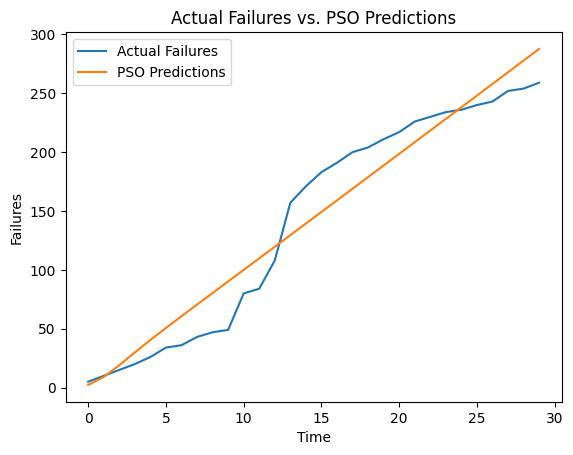

In [55]:
import numpy as np
import random
import matplotlib.pyplot as plt
from pyswarm import pso

def srgm(parameters, data):
    a, b, c, alpha, beta = parameters
    t = np.arange(1, len(data) + 1)
    failure_predicted = (a * (1 - np.exp(-b * t)) * (1 - alpha) + alpha * a * (t ** b)) / (1 + c * np.exp(-b * t))
    return np.sum((data - failure_predicted) ** 2)

def objective_function(parameters, data):
    return srgm(parameters, data)

def pso_optimization(data):
    lb = [0, 0, 0, 0, 0]  # Lower bounds for parameters
    ub = [10, 10, 5, 10, 10]  # Upper bounds for parameters

    # Define the objective function to be minimized
    def objective(p):
        return objective_function(p, data)

    # Perform PSO optimization
    best_parameters, best_cost = pso(objective, lb, ub)

    return best_parameters

failure_data = np.array([5, 10, 15, 20, 26, 34, 36, 43, 47, 49, 80, 84, 108, 157, 171, 183, 191, 200, 204, 211, 217, 226, 230, 234, 236, 240, 243, 252, 254, 259])
best_parameters_pso = pso_optimization(failure_data)

# Generate predictions using the best parameters
predictions_pso = generate_predictions(best_parameters_pso, failure_data)

plt.plot(failure_data, label='Actual Failures')
plt.plot(predictions_pso, label='PSO Predictions')
plt.xlabel('Time')
plt.ylabel('Failures')
plt.title('Actual Failures vs. PSO Predictions')
plt.legend()
plt.show()


In [73]:
import numpy as np
import random
import matplotlib.pyplot as plt
from pyswarm import pso

def srgm(parameters, data):
    a, b, c, alpha, beta = parameters
    t = np.arange(1, len(data) + 1)
    failure_predicted = (a * (1 - np.exp(-b * t)) * (1 - alpha) + alpha * a * (t ** b)) / (1 + c * np.exp(-b * t))
    return np.sum((data - failure_predicted) ** 2)

def objective_function(parameters, data):
    return srgm(parameters, data)

def pso_optimization(data, initial_population):
    lb = [0, 0, 0, 0, 0]  # Lower bounds for parameters
    ub = [10, 10, 5, 10, 10]  # Upper bounds for parameters

    # Define the objective function to be minimized
    def objective(p):
        return objective_function(p, data)

    # Perform PSO optimization
    best_parameters = None
    best_cost = float('inf')
    for initial_params in initial_population:
        xopt, fopt = pso(objective, lb, ub, swarmsize=1000, maxiter=1500, omega=0.8, phip=0.5, phig=0.5, minfunc=1e-8, minstep=1e-8, debug=False, args=())
        if fopt < best_cost:
            best_parameters = xopt
            best_cost = fopt

    return best_parameters

failure_data = np.array([5, 10, 15, 20, 26, 34, 36, 43, 47, 49, 80, 84, 108, 157, 171, 183, 191, 200, 204, 211, 217, 226, 230, 234, 236, 240, 243, 252, 254, 259])

# Run the genetic algorithm exploration to obtain initial population
best_parameters_genetic = genetic_algorithm(failure_data, generations=100, population_size=1000, mutation_rate=0.1)
initial_population = [best_parameters_genetic]

# Perform PSO optimization using the initial population
best_parameters_pso = pso_optimization(failure_data, initial_population)

# Generate predictions using the best parameters
predictions_pso = generate_predictions(best_parameters_pso, failure_data)


Generation: 0, Best Fitness: 6.751974383653378e-05, Best Individual: [0.6812200528788328, 0.992384760920677, 1.9366739155062955, 15.162177048633213, 3.2643022717625185]
Generation: 1, Best Fitness: 6.751974383653378e-05, Best Individual: [0.6812200528788328, 0.992384760920677, 1.9366739155062955, 15.162177048633213, 3.2643022717625185]
Generation: 2, Best Fitness: 6.751974383653378e-05, Best Individual: [0.6812200528788328, 0.992384760920677, 1.9366739155062955, 15.162177048633213, 3.2643022717625185]
Generation: 3, Best Fitness: 6.751974383653378e-05, Best Individual: [0.6812200528788328, 0.992384760920677, 1.9366739155062955, 15.162177048633213, 3.2643022717625185]
Generation: 4, Best Fitness: 6.751974383653378e-05, Best Individual: [0.6812200528788328, 0.992384760920677, 1.9366739155062955, 15.162177048633213, 3.2643022717625185]
Generation: 5, Best Fitness: 6.751974383653378e-05, Best Individual: [0.6812200528788328, 0.992384760920677, 1.9366739155062955, 15.162177048633213, 3.2643

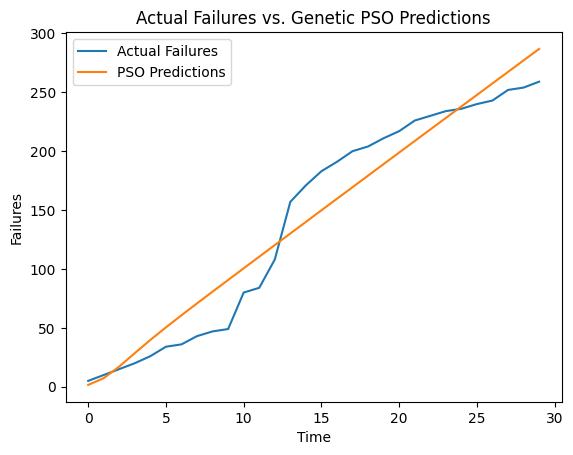

In [74]:
plt.plot(failure_data, label='Actual Failures')
plt.plot(predictions_pso, label='PSO Predictions')
plt.xlabel('Time')
plt.ylabel('Failures')
plt.title('Actual Failures vs. Genetic PSO Predictions')
plt.legend()
plt.show()